In [96]:
!ls

Challenges.ipynb         ThinkBayes               turnstile_150314.txt
Dive Into Python.pdf     Think_Bayes.pdf          turnstile_150321.txt
Emacs Cheat Sheet.pdf    Think_Stats.pdf          turnstile_150404.csv
MTA Turnstile data.ipynb metisgh                  turnstile_150404.txt
Prob_CheatSheet.pdf      turnstile_150307.txt


In [1]:
import csv
import datetime
import dateutil.parser
import matplotlib.pyplot as plt
import pandas as pd
import time
%matplotlib inline

<strong>Challenge 1<strong>

In [2]:
def makeTurnstileFile(turn_file):
    
    turnstile = {}

    with open(turn_file, "r") as turnstile_file:
        reader = csv.reader(turnstile_file)

        reader.next()

        for row in reader:
            first_four = tuple(row[:5])
            end_values = row[4:-1]
            end_values.append(row[-1].rstrip())
            #could also use setdefault method with key, value pairs
            #creates list and appends at same time instead of if/else below
            if first_four in turnstile:
                turnstile[first_four].append(end_values)
            else:
                turnstile[first_four] = [end_values]
    
    return turnstile 

In [3]:
mar21_turn = makeTurnstileFile("turnstile_150321.txt")
mar14_turn = makeTurnstileFile("turnstile_150314.txt")
mar07_turn = makeTurnstileFile("turnstile_150307.txt")

<strong>Challenge 2<strong>

In [4]:
def makePointTime(turnstile):
    
    point_time = {}

    for turn, v  in turnstile.iteritems():
        point_time[turn] = []
        for index, el in enumerate(v):
            date_val, time_val = el[2], el[3]
            time_stamp = date_val + ' ' + time_val
            time_stamp = time.strptime(time_stamp, "%m/%d/%Y %H:%M:%S")
            time_stamp = datetime.datetime(time_stamp[0], time_stamp[1], \
                                           time_stamp[2], time_stamp[3], \
                                           time_stamp[4], time_stamp[5])
            if index == 0:
                point_time[turn] = [(time_stamp, 0)]
            else:
                prev_row = v[index - 1]
                entries = int(el[5]) - int(prev_row[5])
                #only add positive entries.  assume there is something wrong with 
                #negative values.  also only add entries less than 20000 due to midday 
                #count resets.
                if entries >= 0 and entries < 20000:
                    point_time[turn].append((time_stamp, entries))
                   
    return point_time

In [5]:
mar21_point = makePointTime(mar21_turn)
mar14_point = makePointTime(mar14_turn)
mar07_point = makePointTime(mar07_turn)

<strong>Challenge 3<strong>

In [102]:
#def dailyCounts(daily):
    
#    for k, v in daily.iteritems():
#        c = {}
#        for el in v:
#            day = str(el[0].date())
#            day = el[0]
#            count = el[1]
#            c[day] = c.get(day,0) + count
#        daily[k] = sorted(c.items())
    
#    return daily

In [6]:
def makeDailyPerTurnstile(point_time):
    
    daily = {}
    
    for turn, v in point_time.iteritems():
        day_tracker = {}
        for el in v:
            day = str(el[0].date())
            count = el[1]
            day_tracker[day] = day_tracker.get(day,0) + count
        daily[turn] = sorted(day_tracker.items())
    
    return daily

In [7]:
mar21_daily = makeDailyPerTurnstile(mar21_point)
mar14_daily = makeDailyPerTurnstile(mar14_point)
mar07_daily = makeDailyPerTurnstile(mar07_point)

<strong>Challenge 4<strong>

In [8]:
data = mar21_daily.values()
turnstile = data[0]
print turnstile

[('2015-03-14', 359), ('2015-03-15', 432), ('2015-03-16', 862), ('2015-03-17', 976), ('2015-03-18', 854), ('2015-03-19', 908), ('2015-03-20', 889)]


In [9]:
dates, counts = zip(*turnstile)
dates = [dateutil.parser.parse(dates[i]).date() for i in range(len(dates))]

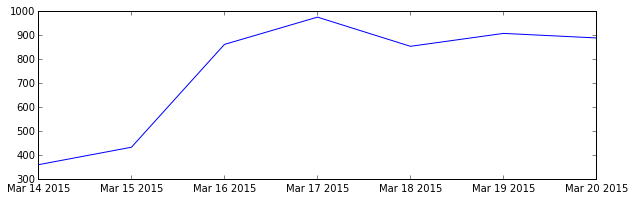

In [10]:
plt.figure(figsize=(10,3)) 
plt.plot(dates, counts)

<strong>Challenge 5<strong>

In [48]:
#def buildDict(daily, key_to_check):
    
#    new_dict = {}
    
#    for k, v in daily.iteritems():
#        if key_to_check in combo:
#            combo[key_to_check].extend(v[:])
#        else:
#            combo[key_to_check] = v[:]
            
#    return new_dict

In [11]:
def makeComboTurnstiles(daily):
    
    combo = {}

    for k, v in daily.iteritems():
        if (k[0], k[1], k[3], k[4]) in combo:
            combo[(k[0], k[1], k[3], k[4])].extend(v[:])
        else:
            combo[(k[0], k[1], k[3], k[4])] = v[:]
    
    for k, v in combo.iteritems():
        c = {}
        for el in v:
            day = el[0]
            count = el[1]
            c[day] = c.get(day,0) + count
        combo[k] = sorted(c.items())
    
    return combo   

In [12]:
mar21_combo = makeComboTurnstiles(mar21_daily)
mar14_combo = makeComboTurnstiles(mar14_daily)
mar07_combo = makeComboTurnstiles(mar07_daily)

<strong>Challenge 6<strong>

In [13]:
def makeStation(daily):
    
    station = {}

    for k, v in daily.iteritems():
        if (k[2], k[3]) in station:
            station[(k[2],k[3])].extend(v[:])
        else:
            station[(k[2], k[3])] = v[:]
    
    for k, v in station.iteritems():
        c = {}
        for el in v:
            day = el[0]
            count = el[1]
            c[day] = c.get(day,0) + count
        station[k] = sorted(c.items())
        
    return station   

In [18]:
mar21_station = makeStation(mar21_combo)
mar14_station = makeStation(mar14_combo)
mar07_station = makeStation(mar07_combo)

<strong>Challenge 7<strong>

In [20]:
data = mar21_station.values()
one_station = sorted(data[3])
print one_station

[('2015-03-14', 10837), ('2015-03-15', 11015), ('2015-03-16', 38504), ('2015-03-17', 42571), ('2015-03-18', 42363), ('2015-03-19', 42544), ('2015-03-20', 39603)]


In [21]:
dates, counts = zip(*one_station)
dates = [dateutil.parser.parse(dates[i]).date() for i in range(len(dates))]

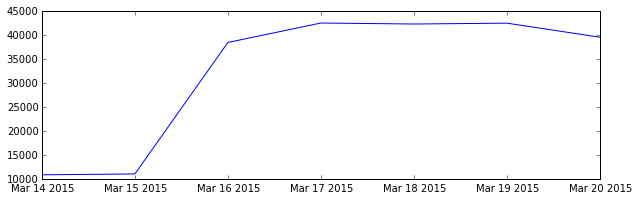

In [22]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

<strong>Challenge 8<strong>

In [23]:
week_stations = []
for mta_file in [mar21_station, mar14_station, mar07_station]:
    week_vals = sorted(mta_file[("LEXINGTON AVE","NQR456")])
    station_week = []
    for el in week_vals:
        station_week.append(el[1])
    week_stations.append(station_week)

In [24]:
print week_stations

[[7927, 8964, 16659, 18139, 18312, 18353, 17802], [9548, 6660, 16476, 18811, 18527, 18699, 18830], [9284, 7219, 16893, 17503, 17350, 16715, 18262]]


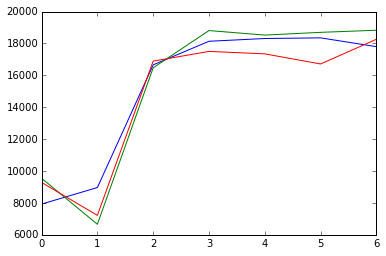

In [25]:
for week in week_stations:
    plt.plot(week)

<strong>Challenge 9<strong>

In [26]:
def makeWeekStation(station):
    
    station_week_total = {}

    for k, v in station.iteritems():
        stat_tot = 0
        for el in v:
            stat_tot += el[1]
        station_week_total[k] = stat_tot
        
    return station_week_total

In [27]:
mar21_week = makeWeekStation(mar21_station)
mar14_week = makeWeekStation(mar14_station)
mar07_week = makeWeekStation(mar07_station)

In [28]:
#loops through 
station_weeks_total = {}

for station_weeks in [mar21_week, mar14_week, mar07_week]:
    for k, v in station_weeks.iteritems():
        station_weeks_total[k] = station_weeks_total.get(k,0) + v

In [29]:
total_stations = station_weeks_total.items()
total_stations = sorted(total_stations, key=lambda station: station[1])

<strong>Challenge 10<strong>

(array([ 363.,   78.,   17.,    7.,    2.,    3.,    0.,    1.,    0.,    1.]),
 array([    5191. ,   279570.3,   553949.6,   828328.9,  1102708.2,
         1377087.5,  1651466.8,  1925846.1,  2200225.4,  2474604.7,
         2748984. ]),
 <a list of 10 Patch objects>)

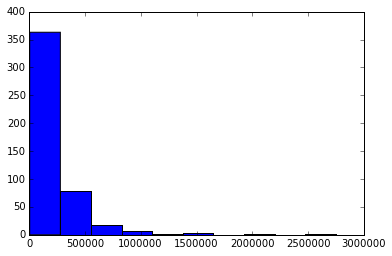

In [30]:
station_name, tot_ridership = zip(*total_stations)
plt.hist(tot_ridership)

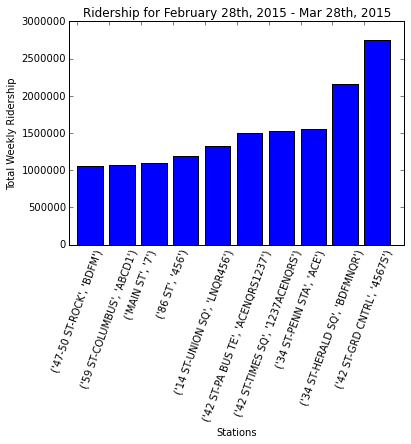

In [33]:
indices = range(len(tot_ridership[-10:]))
plt.bar(indices, tot_ridership[-10:])
plt.xticks(indices, station_name[-10:], rotation=70)
plt.xlim(-0.25,10.25)
plt.xlabel("Stations")
plt.ylabel("Total Weekly Ridership")
plt.title("Ridership for February 28th, 2015 - Mar 28th, 2015")